**If someone has X months of experience, what should their salary be?**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sample dataset incase you don't have an actual one.

In [40]:
dataset = pd.DataFrame({
    'exp(in months)': [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 72, 84, 96, 108, 120],
    'salary(in thousands)': [28, 32, 35, 40, 45, 48, 52, 58, 62, 68, 75, 82, 88, 95, 100]
})

https://www.kaggle.com/datasets/saquib7hussain/experience-salary-dataset


In [69]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# Load your actual dataset from Google Drive
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Experience-Salary.csv")


Mounted at /content/drive


In [70]:
print(dataset.head())

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236


In [71]:
print(dataset.describe())

       exp(in months)  salary(in thousands)
count     1000.000000           1000.000000
mean        26.157825             26.722597
std          8.717091              8.844761
min          0.697594             -1.276342
25%         20.073600             20.531008
50%         25.875225             26.745576
75%         32.406986             32.615753
max         49.463222             55.297016


In [72]:
print(dataset.isnull().sum())

exp(in months)          0
salary(in thousands)    0
dtype: int64


In [90]:
num_samples = len(dataset)
print(f"\n Total training examples (m): {num_samples}")


 Total training examples (m): 1000


***Extract Features (X) and Target (Y)***

In [91]:
experience_months = dataset['exp(in months)'].values
print(f"\n Experience values extracted: {experience_months[:5]}... (showing first 5)")


 Experience values extracted: [18.29029332 17.02340669 26.34361348 19.10583387 27.74251647]... (showing first 5)


In [92]:
salary_thousands = dataset['salary(in thousands)'].values
print(f" Salary values extracted: {salary_thousands[:5]}... (showing first 5)")

 Salary values extracted: [16.52182491 11.66623372 23.16725455 20.87714542 23.16623569]... (showing first 5)


 **Visualize the Data**

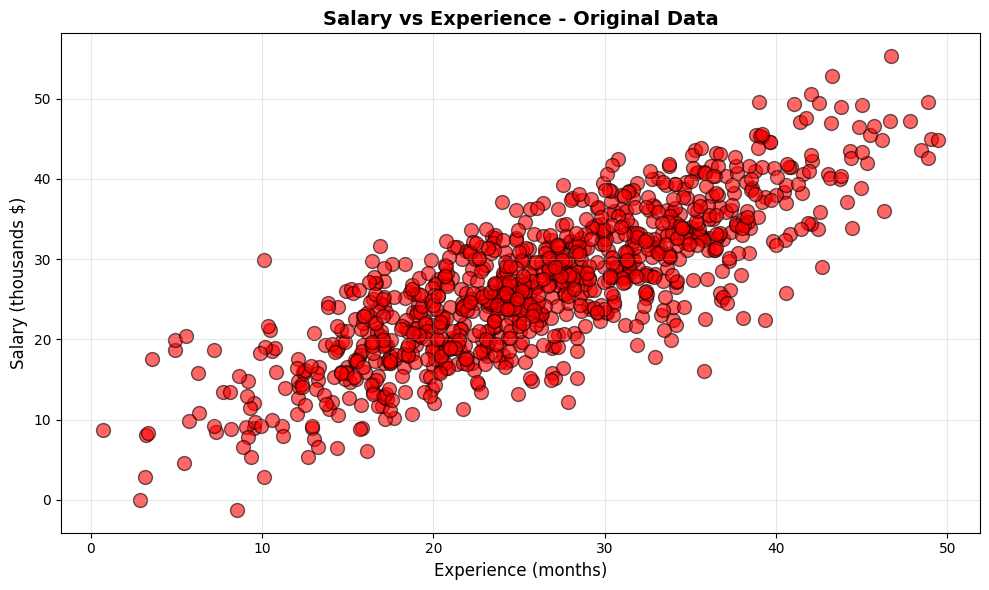

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(experience_months, salary_thousands, color='red', s=100, alpha=0.6, edgecolors='black')
plt.xlabel('Experience (months)', fontsize=12)
plt.ylabel('Salary (thousands $)', fontsize=12)
plt.title('Salary vs Experience - Original Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Feature Scaling (CRITICAL for gradient descent!)**

In [94]:
# Calculate mean and standard deviation for experience
experience_mean = np.mean(experience_months)
experience_std = np.std(experience_months)

# Calculate mean and standard deviation for salary
salary_mean = np.mean(salary_thousands)
salary_std = np.std(salary_thousands)

print(f"\nFeature Scaling Parameters:")
print(f"Experience - Mean: {experience_mean:.2f}, Std: {experience_std:.2f}")
print(f"Salary - Mean: {salary_mean:.2f}, Std: {salary_std:.2f}")


Feature Scaling Parameters:
Experience - Mean: 26.16, Std: 8.71
Salary - Mean: 26.72, Std: 8.84


In [97]:
experience_normalized = (experience_months - experience_mean) / experience_std
salary_normalized = (salary_thousands - salary_mean) / salary_std

print(f"\nFeatures normalized!")
print(f"Normalized experience range: [{experience_normalized.min():.2f}, {experience_normalized.max():.2f}]")
print(f"Normalized salary range: [{salary_normalized.min():.2f}, {salary_normalized.max():.2f}]")



Features normalized!
Normalized experience range: [-2.92, 2.67]
Normalized salary range: [-3.17, 3.23]


In [95]:
def hypothesis(theta_0, theta_1, x):
    """
    Calculate predictions using the linear equation: h(x) = θ₀ + θ₁ * x

    Parameters:
    -----------
    theta_0 : float
        Intercept parameter (bias)
    theta_1 : float
        Slope parameter (weight)
    x : numpy array
        Input features (experience values)

    Returns:
    --------
    predictions : numpy array
        Predicted salary values
    """
    predictions = theta_0 + theta_1 * x
    return predictions

print("\n Hypothesis function defined!")


 Hypothesis function defined!


In [98]:
def compute_cost(theta_0, theta_1, x_values, y_actual):
    """
    Compute the cost function J(θ₀, θ₁) using Mean Squared Error

    Formula: J = (1/2m) * Σ[h(x⁽ⁱ⁾) - y⁽ⁱ⁾]²

    Parameters:
    -----------
    theta_0 : float
        Intercept parameter
    theta_1 : float
        Slope parameter
    x_values : numpy array
        Input features
    y_actual : numpy array
        Actual target values

    Returns:
    --------
    cost : float
        The computed cost (average squared error)
    """
    # Number of training examples
    m = len(y_actual)

    # Calculate predictions for all examples
    predictions = hypothesis(theta_0, theta_1, x_values)

    # Calculate errors (prediction - actual)
    errors = predictions - y_actual

    # Calculate squared errors
    squared_errors = errors ** 2

    # Calculate mean squared error (with 1/2m factor)
    cost = (1 / (2 * m)) * np.sum(squared_errors)

    return cost

print(" Cost function defined!")

 Cost function defined!


**Test the cost function with initial parameters**

In [100]:
initial_cost = compute_cost(0, 0, experience_normalized, salary_normalized)
print(f"\nCost with θ₀=0, θ₁=0: {initial_cost:.4f}")


Cost with θ₀=0, θ₁=0: 0.5000


In [101]:

def gradient_descent(x_values, y_actual, learning_rate=0.01, num_iterations=1000, print_cost=True):
    """
    Perform gradient descent to learn optimal theta_0 and theta_1

    Algorithm:
    1. Start with θ₀ = 0, θ₁ = 0
    2. Repeat for num_iterations:
       - Calculate predictions
       - Calculate errors
       - Compute gradients
       - Update parameters: θⱼ := θⱼ - α * gradient
       - Calculate and store cost

    Parameters:
    -----------
    x_values : numpy array
        Input features (normalized experience)
    y_actual : numpy array
        Target values (normalized salary)
    learning_rate : float
        Step size for parameter updates (α)
    num_iterations : int
        Number of gradient descent iterations
    print_cost : bool
        Whether to print cost during training

    Returns:
    --------
    theta_0_final : float
        Learned intercept parameter
    theta_1_final : float
        Learned slope parameter
    cost_history : list
        Cost at each iteration (for visualization)
    """
    # Initialize parameters to zero
    theta_0 = 0.0
    theta_1 = 0.0

    # Number of training examples
    m = len(y_actual)

    # Store cost history for plotting
    cost_history = []

    # Gradient Descent Loop
    for iteration in range(num_iterations):

        # ---- FORWARD PASS: Calculate predictions ----
        predictions = hypothesis(theta_0, theta_1, x_values)

        # ---- Calculate errors ----
        errors = predictions - y_actual

        # ---- BACKWARD PASS: Calculate gradients ----
        # Gradient for θ₀: (1/m) * Σ[h(x⁽ⁱ⁾) - y⁽ⁱ⁾]
        gradient_theta_0 = (1 / m) * np.sum(errors)

        # Gradient for θ₁: (1/m) * Σ[h(x⁽ⁱ⁾) - y⁽ⁱ⁾] * x⁽ⁱ⁾
        gradient_theta_1 = (1 / m) * np.sum(errors * x_values)

        # ---- UPDATE PARAMETERS (simultaneously) ----
        theta_0 = theta_0 - learning_rate * gradient_theta_0
        theta_1 = theta_1 - learning_rate * gradient_theta_1

        # ---- Calculate current cost ----
        current_cost = compute_cost(theta_0, theta_1, x_values, y_actual)
        cost_history.append(current_cost)

        # ---- Print progress every 100 iterations ----
        if print_cost and (iteration % 100 == 0 or iteration == num_iterations - 1):
            print(f"Iteration {iteration:4d} | Cost: {current_cost:.6f} | θ₀: {theta_0:.4f} | θ₁: {theta_1:.4f}")

    return theta_0, theta_1, cost_history

print("\n Gradient descent function defined!")



 Gradient descent function defined!


In [103]:
print("\n" + "="*70)
print("TRAINING THE MODEL - RUNNING GRADIENT DESCENT")
print("="*70)

# Set hyperparameters
learning_rate_alpha = 0.01   # Step size
num_iterations = 1000        # Number of training iterations

# Run gradient descent to find optimal parameters
theta_0_optimal, theta_1_optimal, cost_history = gradient_descent(
    x_values=experience_normalized,
    y_actual=salary_normalized,
    learning_rate=learning_rate_alpha,
    num_iterations=num_iterations,
    print_cost=True
)

print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)
print(f"\n Optimal Parameters Found:")
print(f"   θ₀ (intercept): {theta_0_optimal:.6f}")
print(f"   θ₁ (slope):     {theta_1_optimal:.6f}")
print(f"   Final Cost:     {cost_history[-1]:.6f}")


TRAINING THE MODEL - RUNNING GRADIENT DESCENT
Iteration    0 | Cost: 0.493456 | θ₀: -0.0000 | θ₁: 0.0081
Iteration  100 | Cost: 0.214345 | θ₀: -0.0000 | θ₁: 0.5171
Iteration  200 | Cost: 0.176950 | θ₀: -0.0000 | θ₁: 0.7034
Iteration  300 | Cost: 0.171940 | θ₀: -0.0000 | θ₁: 0.7716
Iteration  400 | Cost: 0.171268 | θ₀: -0.0000 | θ₁: 0.7966
Iteration  500 | Cost: 0.171178 | θ₀: -0.0000 | θ₁: 0.8057
Iteration  600 | Cost: 0.171166 | θ₀: -0.0000 | θ₁: 0.8090
Iteration  700 | Cost: 0.171165 | θ₀: -0.0000 | θ₁: 0.8103
Iteration  800 | Cost: 0.171164 | θ₀: -0.0000 | θ₁: 0.8107
Iteration  900 | Cost: 0.171164 | θ₀: -0.0000 | θ₁: 0.8109
Iteration  999 | Cost: 0.171164 | θ₀: -0.0000 | θ₁: 0.8109

TRAINING COMPLETE!

 Optimal Parameters Found:
   θ₀ (intercept): -0.000000
   θ₁ (slope):     0.810934
   Final Cost:     0.171164


**Visualize Cost Reduction Over Time**

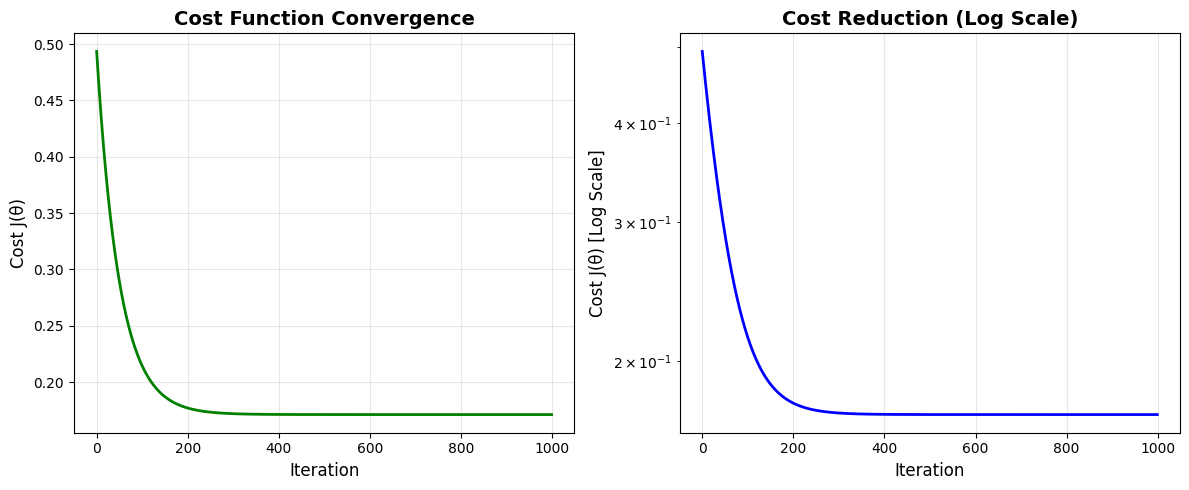


 Cost reduction visualization complete!


In [104]:
plt.figure(figsize=(12, 5))

# Plot 1: Cost vs Iterations
plt.subplot(1, 2, 1)
plt.plot(cost_history, color='green', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ)', fontsize=12)
plt.title('Cost Function Convergence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Cost vs Iterations (Log Scale for better visualization)
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost J(θ) [Log Scale]', fontsize=12)
plt.title('Cost Reduction (Log Scale)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Cost reduction visualization complete!")


**Make Predictions with the Trained Model**

In [106]:
predictions_normalized = hypothesis(theta_0_optimal, theta_1_optimal, experience_normalized)

# We also need predictions in original scale for plotting
# First, denormalize the predictions back to original scale
predictions_original_scale = predictions_normalized * salary_std + salary_mean

print("\n Predictions generated!")


 Predictions generated!


**Visualize the Fitted Line**

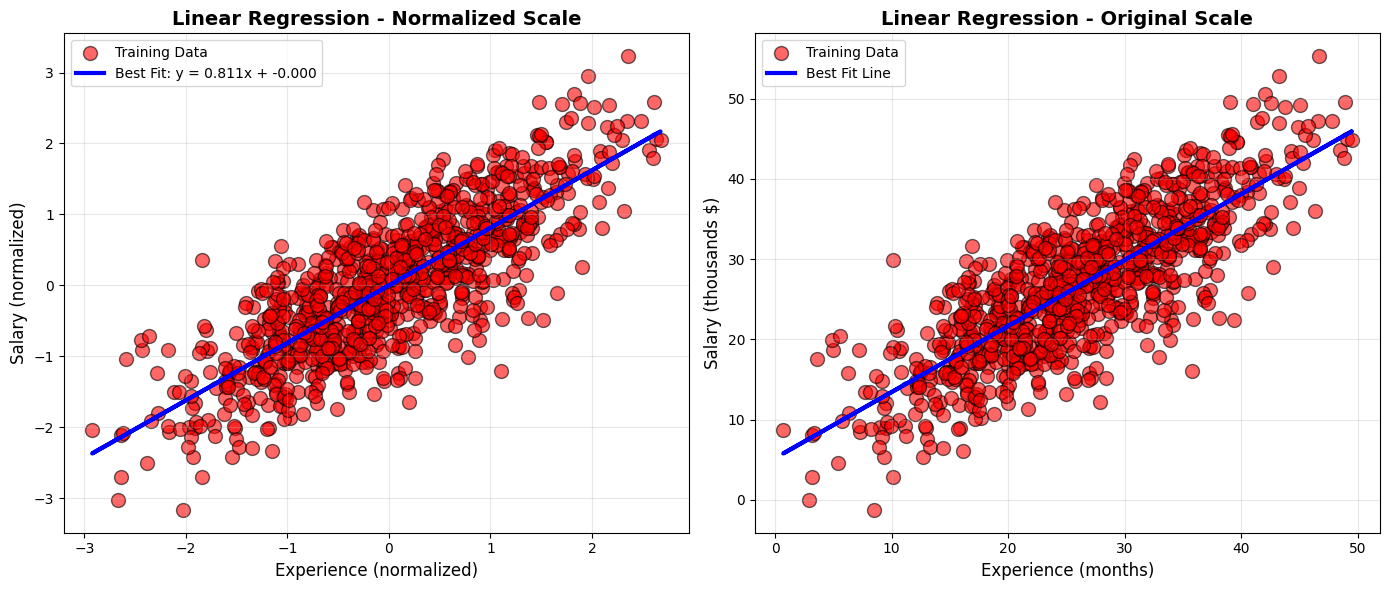


 Model visualization complete!


In [107]:
plt.figure(figsize=(14, 6))

# Plot 1: Normalized scale
plt.subplot(1, 2, 1)
plt.scatter(experience_normalized, salary_normalized, color='red', s=100,
            alpha=0.6, edgecolors='black', label='Training Data')
plt.plot(experience_normalized, predictions_normalized, color='blue',
         linewidth=3, label=f'Best Fit: y = {theta_1_optimal:.3f}x + {theta_0_optimal:.3f}')
plt.xlabel('Experience (normalized)', fontsize=12)
plt.ylabel('Salary (normalized)', fontsize=12)
plt.title('Linear Regression - Normalized Scale', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Original scale
plt.subplot(1, 2, 2)
plt.scatter(experience_months, salary_thousands, color='red', s=100,
            alpha=0.6, edgecolors='black', label='Training Data')
plt.plot(experience_months, predictions_original_scale, color='blue',
         linewidth=3, label='Best Fit Line')
plt.xlabel('Experience (months)', fontsize=12)
plt.ylabel('Salary (thousands $)', fontsize=12)
plt.title('Linear Regression - Original Scale', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Model visualization complete!")

In [108]:
def calculate_r_squared(y_actual, y_predicted):
    """
    Calculate R² (coefficient of determination) score
    R² = 1 - (SS_res / SS_tot)

    R² tells us how much of the variance in Y is explained by our model
    R² = 1.0 means perfect predictions
    R² = 0.0 means model is no better than predicting the mean
    """
    # Total sum of squares (variance in actual data)
    ss_total = np.sum((y_actual - np.mean(y_actual)) ** 2)

    # Residual sum of squares (variance in errors)
    ss_residual = np.sum((y_actual - y_predicted) ** 2)

    # R² score
    r_squared = 1 - (ss_residual / ss_total)

    return r_squared

def calculate_mae(y_actual, y_predicted):
    """
    Calculate Mean Absolute Error
    MAE = (1/m) * Σ|y_actual - y_predicted|
    """
    return np.mean(np.abs(y_actual - y_predicted))

def calculate_rmse(y_actual, y_predicted):
    """
    Calculate Root Mean Squared Error
    RMSE = sqrt((1/m) * Σ(y_actual - y_predicted)²)
    """
    return np.sqrt(np.mean((y_actual - y_predicted) ** 2))

# Calculate metrics
r2_score = calculate_r_squared(salary_thousands, predictions_original_scale)
mae_score = calculate_mae(salary_thousands, predictions_original_scale)
rmse_score = calculate_rmse(salary_thousands, predictions_original_scale)

print("\n" + "="*70)
print(" MODEL PERFORMANCE METRICS")
print("="*70)
print(f"R² Score (Coefficient of Determination): {r2_score:.4f}")
print(f"   → {r2_score*100:.2f}% of variance in salary is explained by experience")
print(f"\nMean Absolute Error (MAE):  ${mae_score:.2f}k")
print(f"   → On average, predictions are off by ${mae_score:.2f}k")
print(f"\nRoot Mean Squared Error (RMSE): ${rmse_score:.2f}k")
print(f"   → Typical prediction error is ${rmse_score:.2f}k")



 MODEL PERFORMANCE METRICS
R² Score (Coefficient of Determination): 0.6577
   → 65.77% of variance in salary is explained by experience

Mean Absolute Error (MAE):  $4.09k
   → On average, predictions are off by $4.09k

Root Mean Squared Error (RMSE): $5.17k
   → Typical prediction error is $5.17k


In [109]:
def predict_salary(months_of_experience):
    """
    Predict salary for a given number of months of experience

    Parameters:
    -----------
    months_of_experience : float
        Number of months of experience

    Returns:
    --------
    predicted_salary : float
        Predicted salary in thousands of dollars
    """
    # Step 1: Normalize the input using training data statistics
    experience_norm = (months_of_experience - experience_mean) / experience_std

    # Step 2: Make prediction using learned parameters (normalized scale)
    salary_norm = hypothesis(theta_0_optimal, theta_1_optimal, experience_norm)

    # Step 3: Denormalize the prediction back to original scale
    predicted_salary = salary_norm * salary_std + salary_mean

    return predicted_salary

print("\n" + "="*70)
print(" MAKING PREDICTIONS FOR NEW DATA")
print("="*70)


test_experiences = [15, 30, 45, 60, 90]

print("\nPredictions for new candidates:\n")
for months in test_experiences:
    predicted_sal = predict_salary(months)
    print(f" {months} months ({months/12:.1f} years) experience → ${predicted_sal:.2f}k salary")

# Interactive prediction
print("\n" + "="*70)
print("💡 TRY YOUR OWN PREDICTION")
print("="*70)


 MAKING PREDICTIONS FOR NEW DATA

Predictions for new candidates:

 15 months (1.2 years) experience → $17.54k salary
 30 months (2.5 years) experience → $29.88k salary
 45 months (3.8 years) experience → $42.23k salary
 60 months (5.0 years) experience → $54.57k salary
 90 months (7.5 years) experience → $79.25k salary

💡 TRY YOUR OWN PREDICTION


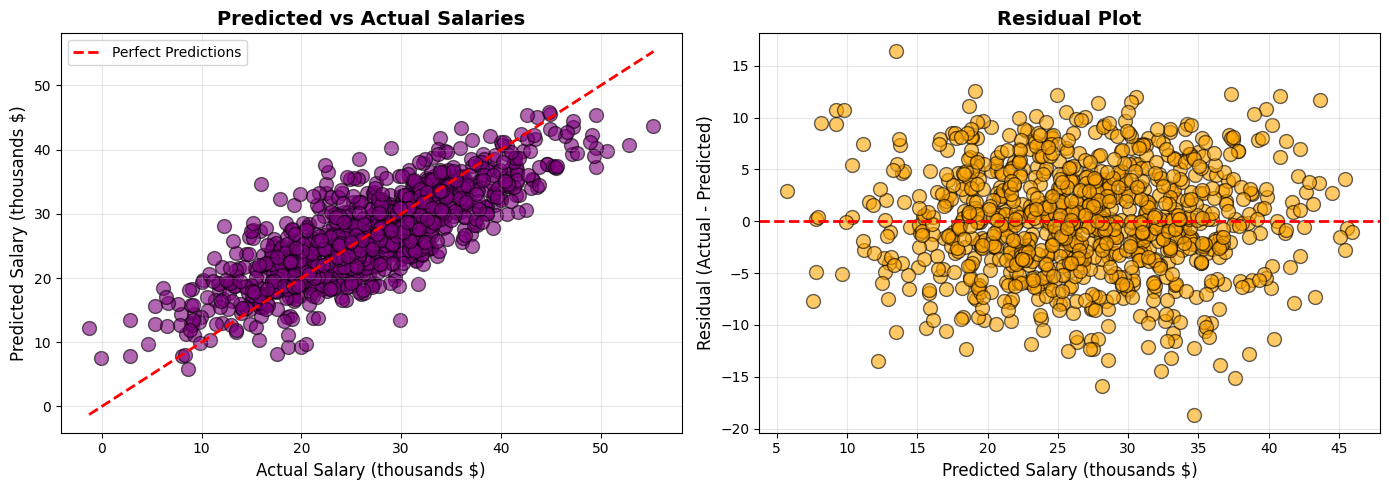


 Residual analysis complete!


In [111]:
plt.figure(figsize=(14, 5))

# Plot 1: Predicted vs Actual
plt.subplot(1, 2, 1)
plt.scatter(salary_thousands, predictions_original_scale, color='purple',
            s=100, alpha=0.6, edgecolors='black')
plt.plot([salary_thousands.min(), salary_thousands.max()],
         [salary_thousands.min(), salary_thousands.max()],
         'r--', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual Salary (thousands $)', fontsize=12)
plt.ylabel('Predicted Salary (thousands $)', fontsize=12)
plt.title('Predicted vs Actual Salaries', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals (errors)
residuals = salary_thousands - predictions_original_scale
plt.subplot(1, 2, 2)
plt.scatter(predictions_original_scale, residuals, color='orange',
            s=100, alpha=0.6, edgecolors='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Salary (thousands $)', fontsize=12)
plt.ylabel('Residual (Actual - Predicted)', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Residual analysis complete!")

In [113]:

print("\n" + "="*70)
print("SUMMARY AND KEY INSIGHTS")
print("="*70)

# Interpret the slope
salary_increase_per_month = theta_1_optimal * salary_std / experience_std
print(f"\n Model Interpretation:")
print(f"   → For every additional month of experience,")
print(f"     salary increases by approximately ${salary_increase_per_month:.2f}k")

years_to_double = (salary_mean) / (salary_increase_per_month * 12)
print(f"\n   → At this rate, salary would double in approximately {years_to_double:.1f} years")

print(f"\n Model Quality:")
if r2_score > 0.9:
    print(f"   → Excellent fit! (R² = {r2_score:.4f})")
elif r2_score > 0.7:
    print(f"   → Good fit! (R² = {r2_score:.4f})")
elif r2_score > 0.5:
    print(f"   → Moderate fit (R² = {r2_score:.4f})")
else:
    print(f"   → Poor fit - consider adding more features (R² = {r2_score:.4f})")

print("\n" + "="*70)
print(" LINEAR REGRESSION ANALYSIS COMPLETE!")
print("="*70)



SUMMARY AND KEY INSIGHTS

 Model Interpretation:
   → For every additional month of experience,
     salary increases by approximately $0.82k

   → At this rate, salary would double in approximately 2.7 years

 Model Quality:
   → Moderate fit (R² = 0.6577)

 LINEAR REGRESSION ANALYSIS COMPLETE!


In [114]:
model_parameters = {
    'theta_0': theta_0_optimal,
    'theta_1': theta_1_optimal,
    'experience_mean': experience_mean,
    'experience_std': experience_std,
    'salary_mean': salary_mean,
    'salary_std': salary_std,
    'r2_score': r2_score,
    'rmse': rmse_score
}

print("\n Model parameters saved in 'model_parameters' dictionary")
print("   You can use these to make predictions without retraining!")



 Model parameters saved in 'model_parameters' dictionary
   You can use these to make predictions without retraining!
